<a href="https://colab.research.google.com/github/Balti-ENICARTHAGE/Balti-Ala/blob/main/Copie_de_TP_N%C2%B04_trasfert_learning_Convolutional_Neural_Network_for_COVID_19_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
!unzip /content/drive/MyDrive/data.zip # Décompresser votre base de données à partir du Drive

Archive:  /content/drive/MyDrive/data.zip
replace data/TEST/COVID-19.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [56]:
import os
print('total Validation COVID-19 images:', len(os.listdir('/content/data/VAL/COVID-19')))
print('total Validation Healthy images:', len(os.listdir('/content/data/VAL/Healthy')))

print('total Training COVID-19 images:', len(os.listdir('/content/data/TRAIN/COVID-19')))
print('total Training Healthy images:', len(os.listdir('/content/data/TRAIN/Healthy')))

total Validation COVID-19 images: 5
total Validation Healthy images: 5
total Training COVID-19 images: 20
total Training Healthy images: 19


In [57]:
train_dir = '/content/data/TRAIN'
validation_dir = '/content/data/VAL'

In [58]:
from tensorflow.keras import applications
from keras.models import Sequential
from keras.layers import Dropout,Dense,Conv2D,GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
img_width,img_height=224,224
base_model =applications.VGG19(weights='imagenet',include_top=False,input_shape=(img_width,img_height,3))
top_model=Sequential()
top_model.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:],data_format=None))
top_model.add(Dense(256,activation='relu'))
top_model.add(Dropout(0.25))
top_model.add(Dense(1,activation='sigmoid'))
model=Model(inputs=base_model.input,outputs=top_model(base_model.output))



In [59]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [60]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=5,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')
Val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=2,
    class_mode='binary')#  ""categorical"" ou ""binary"""
validation_generator = Val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=2,
    class_mode='binary')

Found 39 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [61]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_generator,epochs=25, validation_data=validation_generator,callbacks=callbacks_list)

Epoch 1/25
20/20 [==============================] - 3s 115ms/step - loss: 2.1222 - accuracy: 0.4103 - val_loss: 0.9625 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/25
20/20 [==============================] - 2s 98ms/step - loss: 1.1546 - accuracy: 0.3846 - val_loss: 0.7406 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/25
20/20 [==============================] - 2s 94ms/step - loss: 0.8897 - accuracy: 0.5128 - val_loss: 0.7180 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/25
20/20 [==============================] - 2s 96ms/step - loss: 0.7527 - accuracy: 0.3333 - val_loss: 0.6961 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/25
20/20 [==============================] - 2s 97ms/step - loss: 0.8004 - accuracy: 0.3077 - val_loss: 0.6950 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/25
20/20 [==============================] - 2s 97ms/step - loss: 0.7254 - accuracy: 0.5128 - val_loss: 0.6948 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/25
20/20 [==============================] - 2s 98ms/step - loss: 0.

In [66]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [67]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='/content/data/TEST/Healthy.jpeg'

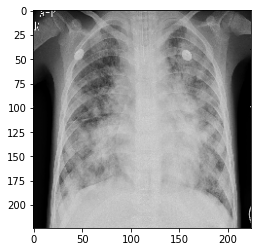

1/1 [==============================] - 0s 17ms/step
[[0.4645433]]
Predicted: [[0.4645433]] COVID-19


In [69]:
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print(score)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')